In [1]:

#sklearn for creating the model

import sklearn

# pandas library used here for inspection of dataset

import pandas as pd
# numpy is used here for binning method
import numpy as np
# matplotlib is used to visualize the data
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
#seaborn is also  used for visualize the data
import seaborn as sb
# decision tree and random forest regressor for predicting the output
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve,KFold
from sklearn.preprocessing import MinMaxScaler , Normalizer
from sklearn.metrics import  explained_variance_score, mean_squared_error,mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

# Importing dataset and Explore

In [2]:
df=pd.read_csv("train.csv")
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [3]:
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

# Data Visualization

In [5]:
np.random.seed(368)
N_points = 10000
n_bins = 20

In [6]:
x = np.random.randn(N_points)
y = .8 ** x + np.random.randn(10000) + 25

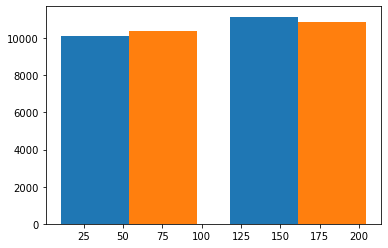

In [7]:
np.random.seed(456)
x = (df['std_ThermalConductivity'], df['wtd_std_ThermalConductivity'])
plt.hist(x, bins = 2)
plt.show()

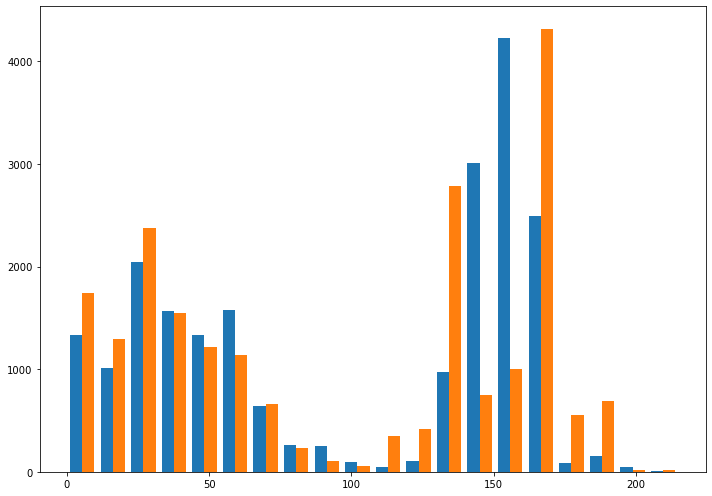

In [8]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(x, bins = n_bins)
plt.show()

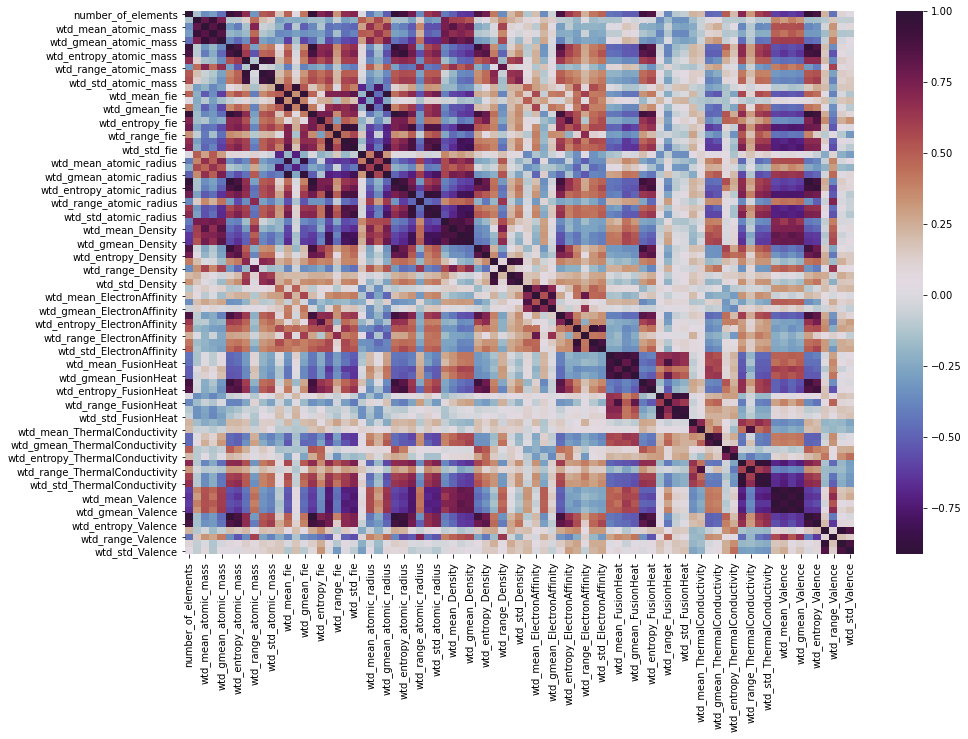

In [9]:
plt.figure(figsize=(15,10))
sb.heatmap(df.iloc[:,:-1].corr(),cmap='twilight_shifted')## relation between categorical data
plt.show()

In [10]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


# Train and test split

In [11]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1] 
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1)

In [12]:
scalerx = MinMaxScaler()
x_train = scalerx.fit_transform(x_train)
x_test = scalerx.transform(x_test)

# PCA model

In [13]:
pca = PCA(n_components = 30)
pca.fit(x_train)

PCA(n_components=30)

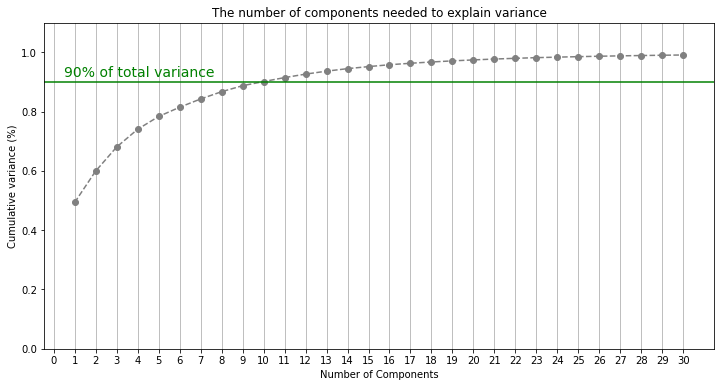

In [14]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 31, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='grey')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 31, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.9, color='g', linestyle='-')
plt.text(0.5, 0.92, '90% of total variance', color = 'g', fontsize=14)

ax.grid(axis='x')
plt.show()

In [15]:
def cross_validation(model,x_train,y_train):
    mae=[]
    mse=[]
    for n in range(1,31):
        pca = PCA(n_components = n)
        pca.fit(x_train)
        x_train_pca = pca.transform(x_train)
        scores = cross_validate(model, x_train_pca,y_train, scoring=("neg_mean_squared_error", "neg_mean_absolute_error"), cv=10)
        mse.append(-scores['test_neg_mean_squared_error'].mean())
        mae.append(-scores['test_neg_mean_absolute_error'].mean())
    d = {'number of components': list(range(1,31)),'mae':mae,'mse':mse}
    # plot mae and mse
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(range(1,31),mae, marker='o')
    ax1.title.set_text('cv-MAE vs number of PCA components')
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.plot(range(1,31), mse, marker='o' )
    ax2.title.set_text('cv-MSE vs number of PCA components')
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

    return pd.DataFrame(d)

In [16]:
pca = PCA(n_components = 10)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

# Random Forest Regressor

In [17]:
model = RandomForestRegressor()

#candidate values of hyperparameters
parameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'n_estimators': [100, 300, 500,700]}
grid = GridSearchCV(model, parameters, cv=3, n_jobs=-1)
grid.fit(x_train_pca, y_train.ravel())
print('Best depth:',grid.best_estimator_.max_depth) 
print('Best number of features:',grid.best_estimator_.max_features)
print('Best number of trees:',grid.best_estimator_.n_estimators)

Best depth: 80
Best number of features: 3
Best number of trees: 700


In [18]:
model=RandomForestRegressor(n_estimators=500,bootstrap=True,random_state=21,verbose=0,max_depth=100,max_features=3)
model.fit(x_train_pca,y_train.ravel())
y_pred = model.predict(x_test_pca)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("mae score = ",mae)
print("mse score = ",mse)

mae score =  5.938242439112385
mse score =  104.75279712401341


# Decision Tree Regressor

In [19]:

from sklearn.tree import DecisionTreeRegressor

In [20]:
def cross_validation(model,x_train,y_train):
    mae=[]
    mse=[]
    for n in range(1,31):
        pca = PCA(n_components = n)
        pca.fit(x_train)
        x_train_pca = pca.transform(x_train)
        scores = cross_validate(model, x_train_pca,y_train, scoring=("neg_mean_squared_error", "neg_mean_absolute_error"), cv=10)
        mse.append(-scores['test_neg_mean_squared_error'].mean())
        mae.append(-scores['test_neg_mean_absolute_error'].mean())
    d = {'number of components': list(range(1,31)),'mae':mae,'mse':mse}
    # plot mae and mse
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(range(1,31),mae, marker='o')
    ax1.title.set_text('cv-MAE vs number of PCA components')
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.plot(range(1,31), mse, marker='o' )
    ax2.title.set_text('cv-MSE vs number of PCA components')
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

    return pd.DataFrame(d)
        

,number of components,mae,mse
0,1,14.428421,613.093545
1,2,10.600636,387.480695
2,3,8.541026,281.238625
3,4,7.560853,222.975724
4,5,7.136339,195.905489
5,6,7.016636,186.618356
6,7,6.890905,181.368613
7,8,6.861446,180.162840
8,9,6.842916,175.728156
9,10,6.775930,173.815640


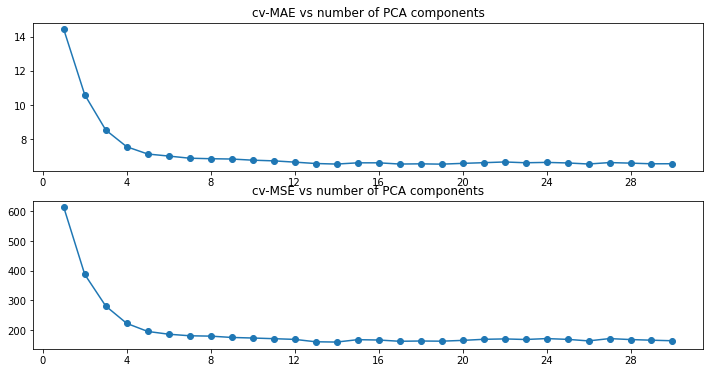

In [21]:
regressor = DecisionTreeRegressor()
cross_validation(regressor,x_train,y_train)

In [22]:
pca = PCA(n_components = 10)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
regressor = DecisionTreeRegressor(random_state=0)
path = regressor.cost_complexity_pruning_path(x_train_pca, y_train)
ccp_alphas=path.ccp_alphas
pd.DataFrame(ccp_alphas).describe()

,0
count,1.237900e+04
mean,8.757560e-02
std,5.650630e+00
min,-9.505573e-17
25%,8.709588e-06
50%,1.475073e-04
75%,2.103390e-03
max,6.194107e+02


In [23]:
pca = PCA(n_components = 10)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
regressor = DecisionTreeRegressor(ccp_alpha=0) 
regressor.fit(x_train_pca,y_train)
#predict the test data
y_pred = regressor.predict(x_test_pca)

In [24]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("mae score = ",mae)
print("mse score = ",mse)

mae score =  6.809915491201127
mse score =  169.49508521206383
